In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uber_df = pd.read_csv(r"C:\Users\risha\Downloads\My Uber Drives - 2016.csv")

In [4]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
uber_df.shape

(1156, 7)

In [6]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
uber_df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
uber_df.dropna(inplace=True)

In [9]:
uber_df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

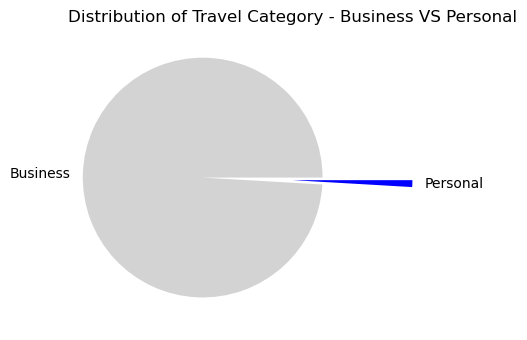

In [44]:
uber_df['CATEGORY*'].value_counts().plot(kind = 'pie',labels=['Business','Personal'],ylabel='',title='Distribution of Travel Category - Business VS Personal',explode=[0.75,0],colors=['#D3D3D3','#0000FF'])
plt.show()

Text(0.5, 1.0, 'Travel Purpose Distribution')

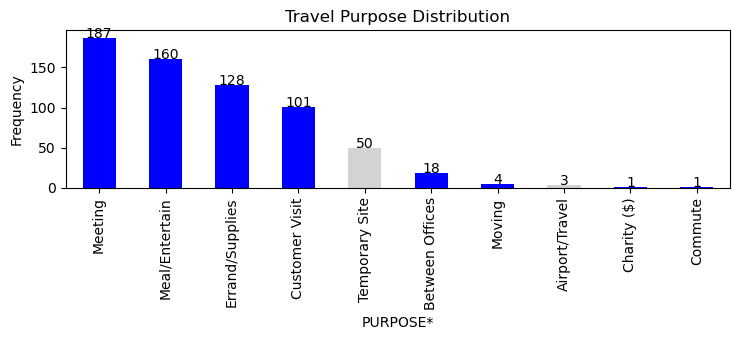

In [45]:
temp_purpose = uber_df['PURPOSE*'].value_counts()
purpose_colors = ['#FF0000','#D3D3D3','#D3D3D3','#FF0000','#D3D3D3','#FF0000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',]
temp_purpose.plot(kind = 'bar',color = colors)
for i in range(len(temp_purpose)):
    plt.text(i, temp_purpose.iloc[i], temp_purpose.iloc[i], ha='center')
plt.ylabel('Frequency')
plt.title('Travel Purpose Distribution')

In [12]:
uber_df['START_DATE*'] = uber_df['START_DATE*'].str.replace('/','-')
uber_df[['START_DATE','START_TIME']] = uber_df['START_DATE*'].str.split(' ',expand=True)
uber_df[['START_HOUR','START_MIN']] = uber_df['START_TIME'].str.split(':',expand=True)
uber_df[['START_MONTH','START_DATE','START_YEAR']] = uber_df['START_DATE'].str.split('-',expand=True)

In [13]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,START_HOUR,START_MIN,START_MONTH,START_YEAR
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01,21:11,21,11,01,2016
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,02,20:25,20,25,01,2016
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,05,17:31,17,31,01,2016
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,06,14:42,14,42,01,2016
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,06,17:15,17,15,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12-31-2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,31,1:07,1,07,12,2016
1151,12-31-2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,31,13:24,13,24,12,2016
1152,12-31-2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,31,15:03,15,03,12,2016
1153,12-31-2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,31,21:32,21,32,12,2016


In [14]:
sorted_values = uber_df['START_DATE'].value_counts().sort_index()

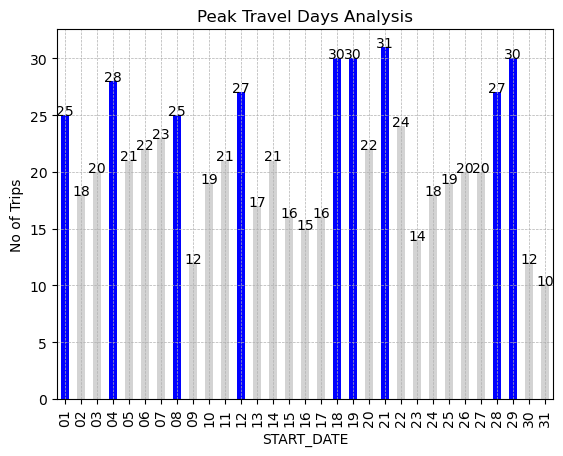

In [15]:
colors = ['#0000FF' if i >= 25 else "#D3D3D3" for i in sorted_values.values]
sorted_values.plot(kind='bar',color=colors)
plt.grid(linestyle = '--', linewidth = 0.5)
for i in range(len(sorted_values)):
    plt.text(i, sorted_values.iloc[i],sorted_values.iloc[i], ha='center')
plt.ylabel("No of Trips")
plt.title('Peak Travel Days Analysis')
plt.show()


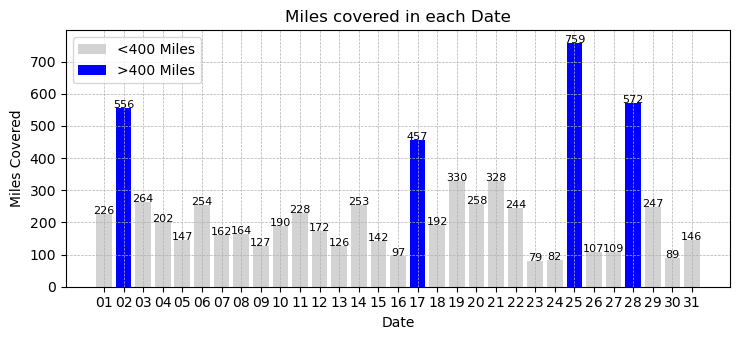

In [16]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()


daily_miles = uber_df.groupby('START_DATE')['MILES*'].sum()
colors = ['#0000FF' if i >= 400 else "#D3D3D3" for i in daily_miles.values]
daily_miles_plot = plt.bar(daily_miles.index,daily_miles.values,color = colors)
for i in range(len(daily_miles)):
    plt.text(i, daily_miles.iloc[i],round(daily_miles.iloc[i]), ha='center',fontsize=8)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('Date')
plt.ylabel('Miles Covered')
plt.title('Miles covered in each Date')

plt.legend(daily_miles_plot,['<400 Miles','>400 Miles'],loc='upper left')


In [17]:
uber_df['START_HOUR'] = uber_df['START_HOUR'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
peak_hour_plot = uber_df['START_HOUR'].value_counts().sort_index()

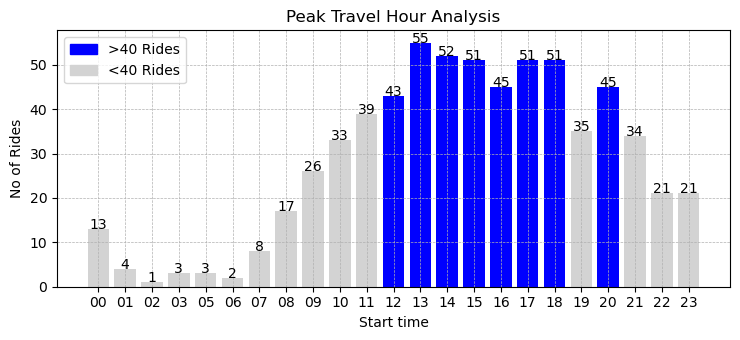

In [18]:
import matplotlib.patches as mpatches
colors = ['#0000FF' if i >=40 else "#D3D3D3" for i in peak_hour_plot.values]
peak_hour_bar = plt.bar(peak_hour_plot.index, peak_hour_plot.values,color = colors)
plt.grid(linestyle = '--',linewidth = 0.5)
for i in range(len(peak_hour_plot)):
    plt.text(i, peak_hour_plot.iloc[i],peak_hour_plot.iloc[i], ha='center')
plt.xlabel('Start time')
plt.ylabel('No of Rides')
plt.title('Peak Travel Hour Analysis')

pop_a = mpatches.Patch(color='#0000FF',label='>40 Rides')
pop_b = mpatches.Patch(color='#D3D3D3',label='<40 Rides')
plt.legend(handles=[pop_a,pop_b],loc='upper left')

In [19]:
hourly_miles = uber_df.groupby('START_HOUR')['MILES*'].sum()

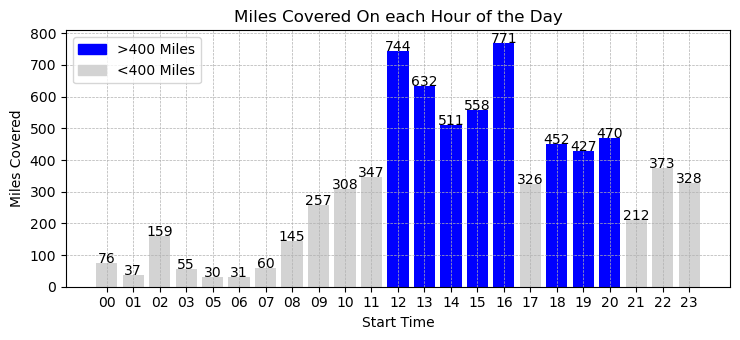

In [20]:
colors = ['#0000FF' if i >= 400 else '#D3D3D3' for i in hourly_miles.values]
hourly_miles_plot = plt.bar(hourly_miles.index,hourly_miles.values,color = colors)
plt.grid(linestyle = '--',linewidth = 0.5)

for i in range(len(hourly_miles)):
  plt.text(i, hourly_miles.iloc[i], round(hourly_miles.iloc[i]), ha='center')
plt.xlabel('Start Time')
plt.ylabel('Miles Covered')
plt.title('Miles Covered On each Hour of the Day')

pop_a = mpatches.Patch(color='#0000FF',label='>400 Miles')
pop_b = mpatches.Patch(color='#D3D3D3',label='<400 Miles')
plt.legend(handles=[pop_a,pop_b],loc='upper left')

In [21]:
uber_df['START_MONTH'] = uber_df['START_MONTH'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
peak_travel_month = uber_df['START_MONTH'].value_counts().sort_index()

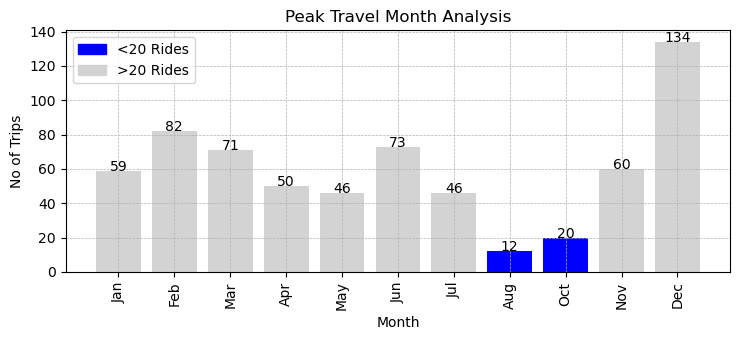

In [33]:
colors = ['#D3D3D3' if i >=40 else "#0000FF" for i in peak_travel_month.values]
peak_travel_plot = plt.bar(peak_travel_month.index,peak_travel_month.values,color = colors)
plt.grid(linestyle='--',linewidth = 0.5)
for i in range(len(peak_travel_month)):
  plt.text(i, peak_travel_month.iloc[i], peak_travel_month.iloc[i], ha='center')
plt.xlabel('Month')
plt.ylabel('No of Trips')
plt.title('Peak Travel Month Analysis')
label_text = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec']
label_pos = np.arange(len(label_text))
plt.xticks(label_pos,label_text,rotation=90)

pop_a = mpatches.Patch(color='#0000FF', label='<20 Rides')
pop_b = mpatches.Patch(color='#D3D3D3', label='>20 Rides')
plt.legend(handles=[pop_a,pop_b],loc='upper left')

In [37]:
Total_miles = uber_df.groupby('START_MONTH')['MILES*'].sum()

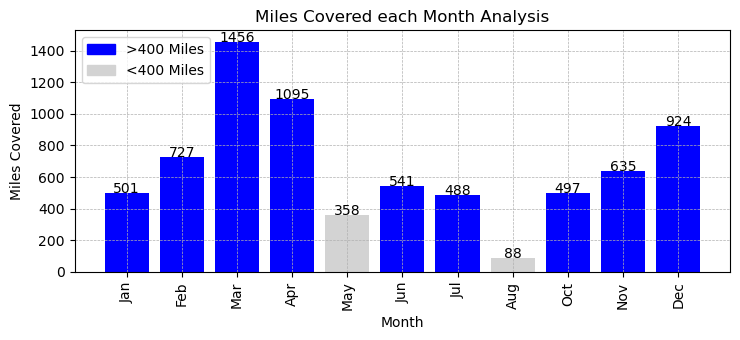

In [42]:
colors = ['#0000FF' if i >=400 else "#D3D3D3" for i in Total_miles.values]
Total_miles_plot = plt.bar(Total_miles.index,Total_miles.values,color = colors)
plt.grid(linestyle='--',linewidth = 0.5)
for i in range(len(Total_miles)):
  plt.text(i, Total_miles.iloc[i], round(Total_miles.iloc[i]), ha='center')
plt.xlabel('Month')
plt.ylabel('Miles Covered')
plt.title('Miles Covered each Month Analysis')
label_text = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec']
label_pos = np.arange(len(label_text))
plt.xticks(label_pos,label_text,rotation=90)

pop_a = mpatches.Patch(color='#0000FF', label='>400 Miles')
pop_b = mpatches.Patch(color='#D3D3D3', label='<400 Miles')
plt.legend(handles=[pop_a,pop_b],loc='upper left')
